# прогнозирование спроса на новые товары
#### иса гадаев павел манякин георгий дудин при поддержке retro goldwyn mayer

### chapter 1: eda&data cleaning

In [97]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection as skr
import statsmodels.formula.api as sm
import statsmodels.api as sm2
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.graphics.regressionplots as smg
from sklearn.metrics import r2_score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from typing import List, Dict, Tuple

%matplotlib inline

sns.set()

In [2]:
test_df = pd.read_csv("hse-dab-naf-23/test.csv")
pd.set_option('display.max_columns', None)

test_df.head(10)

,product_id,location_id,period_dt,id
0,22939,1162,2019-12-30,16
1,23162,1162,2019-12-30,7867
2,23163,1162,2019-12-16,8667
3,23632,798,2019-12-23,14835
4,23633,1347,2019-12-30,14959
5,24007,764,2019-12-16,24820
6,32646,380,2019-12-16,35688
7,34846,866,2019-12-23,41293
8,34847,764,2019-12-16,41644
9,34847,1034,2019-12-30,41646


In [3]:
train_df = pd.read_csv("hse-dab-naf-23/train.csv", sep=',')

train_df.head(10)

,period_dt,location_id,product_id,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,id
0,2019-12-30,425.0,22939.0,NaN,0.0,0.0,3649.0,2736.75,0.0,0.0,1
1,2019-12-30,525.0,22939.0,NaN,0.0,0.0,3649.0,2371.85,0.0,1.0,3
2,2019-12-30,557.0,22939.0,NaN,0.0,0.0,3649.0,2736.75,0.0,1.0,5
3,2019-12-30,562.0,22939.0,NaN,0.0,0.0,3649.0,2736.75,0.0,0.0,7
4,2019-12-30,637.0,22939.0,NaN,0.0,0.0,3649.0,3101.65,0.0,0.0,9
5,2019-12-16,637.0,22939.0,NaN,0.0,0.0,3649.0,3101.65,0.0,0.0,10
6,2019-12-09,637.0,22939.0,NaN,0.0,0.0,3649.0,3101.65,0.0,1.0,11
7,2019-12-30,657.0,22939.0,NaN,0.0,0.0,3649.0,2736.75,0.0,1.0,12
8,2019-12-23,657.0,22939.0,NaN,0.0,0.0,3649.0,2736.75,0.0,1.0,13
9,2019-12-16,764.0,22939.0,NaN,0.0,0.0,3649.0,2371.85,0.0,1.0,14


In [4]:
product_df = pd.read_csv("hse-dab-naf-23/PRODUCT.csv", sep=';')

product_df.head(10)

,PRODUCT_RK,PRODUCT_LVL_RK6,PRODUCT_LVL_RK5,PRODUCT_LVL_RK4,PRODUCT_LVL_RK3,PRODUCT_LVL_RK2,PRODUCT_LVL_RK1,SALES_INTRODUCTION_DT,SALES_DISCONTINUED_DT,VALID_FROM_DTTM,VALID_TO_DTTM,PROCESSED_DTTM,PRODUCT_ADK_hashing,PRODUCT_ID_hashing,PRODUCT_NM_hashing,PRODUCT_DESC_hashing,LANGUAGE_CD_hashing,PRODUCT_LVL_ID6_hashing,PRODUCT_LVL_NM6_hashing,PRODUCT_LVL_DESC6_hashing,PRODUCT_LVL_ID5_hashing,PRODUCT_LVL_NM5_hashing,PRODUCT_LVL_DESC5_hashing,PRODUCT_LVL_ID4_hashing,PRODUCT_LVL_NM4_hashing,PRODUCT_LVL_DESC4_hashing,PRODUCT_LVL_ID3_hashing,PRODUCT_LVL_NM3_hashing,PRODUCT_LVL_DESC3_hashing,PRODUCT_LVL_ID2_hashing,PRODUCT_LVL_NM2_hashing,PRODUCT_LVL_DESC2_hashing,PRODUCT_LVL_ID1_hashing,PRODUCT_LVL_NM1_hashing,PRODUCT_LVL_DESC1_hashing,PRODUCT_ATTRIB1_hashing,PRODUCT_ATTRIB2_hashing,PRODUCT_ATTRIB3_hashing,PRODUCT_ATTRIB4_hashing,PRODUCT_ATTRIB5_hashing,PRODUCT_ATTRIB6_hashing,PRODUCT_ATTRIB7_hashing,PRODUCT_ATTRIB8_hashing,PRODUCT_ATTRIB9_hashing,PRODUCT_ATTRIB10_hashing,PRODUCT_ATTRIB11_hashing,PRODUCT_ATTRIB12_hashing,PRODUCT_ATTRIB13_hashing,PRODUCT_ATTRIB14_hashing,PRODUCT_ATTRIB15_hashing,PRODUCT_ATTRIB16_hashing,PRODUCT_ATTRIB17_hashing,PRODUCT_ATTRIB18_hashing,PRODUCT_ATTRIB19_hashing,PRODUCT_ATTRIB20_hashing,PRODUCT_ATTRIB21_hashing,PRODUCT_ATTRIB22_hashing,PRODUCT_ATTRIB23_hashing,PRODUCT_ATTRIB24_hashing,PRODUCT_ATTRIB25_hashing,PRODUCT_ATTRIB26_hashing,PRODUCT_ATTRIB27_hashing,PRODUCT_ATTRIB28_hashing,PRODUCT_ATTRIB29_hashing,PRODUCT_ATTRIB30_hashing,PRODUCT_ATTRIB31_hashing,PRODUCT_TYPE_CD_hashing
0,11316,10224,10198,113533,10125,9711,1,NaN,NaN,15Mar2018:14:08:14,01Jan5999:00:00:00,03Jan2020:07:01:13,A5C279811C3210EB8CFD7027E51ADAC4,419E9D9BC063B0471F98BA65344206C1,4E055B6F492B9AAD0A791B9D5D3A165E,E5E1FA47D79C1D573A65E2A4D17F6E6E,3A73A94D029959DC71AF0AFCB9F2189E,0DC45A0D604E45ED8BA0A4ED142A386C,6EE6DFA5CFDC795C76C96862BC7F09A4,E5E1FA47D79C1D573A65E2A4D17F6E6E,BC8A69BA32EB41D5455D2EB96F8A12C6,713FF050F1DE07BB666862D98DB97371,E5E1FA47D79C1D573A65E2A4D17F6E6E,0281FFC7E864B8858E7611BB38B9B978,4CBE937C147AE54DF264D9443DBE7335,E5E1FA47D79C1D573A65E2A4D17F6E6E,F1A5375C05FFFD9BB9905FAC97D28B57,95373222989EEE03015ED15345546FAC,E5E1FA47D79C1D573A65E2A4D17F6E6E,7A2CC583A6FFD094E3F6A33CF672D82E,F53A5BABC3AB3A013F7E4648151E89B6,E5E1FA47D79C1D573A65E2A4D17F6E6E,DE3658788669708702FFF3C7D966703C,4A769F24B4FCA27347F42F9EA580C92C,E5E1FA47D79C1D573A65E2A4D17F6E6E,B2581C791DBB8894BFDCFB66B60A17ED,E02A565DBB97BDD239002A471B812C1F,CE6E6B615231B052EF75AEDBED6491A5,FA49AADB69612563EC488572DD6BD92C,DFB3D6F28924754EB60C4E5B39E4D86B,FE26708E98829533D1F2877AC0D06DAC,67442CF09DCF9C0C0C02977AC80A5E52,3797D379D4D05BB733CA37EDFE74A29C,B2581C791DBB8894BFDCFB66B60A17ED,ADB238A5FA27E863EB4F190A2A400A30,5C9AE6F0DD3641D7E0B3DF4936F8EF60,67442CF09DCF9C0C0C02977AC80A5E52,3797D379D4D05BB733CA37EDFE74A29C,B2581C791DBB8894BFDCFB66B60A17ED,B2581C791DBB8894BFDCFB66B60A17ED,0236155B72D4F01753F8D5460D0532E3,FF83472786DB3B25D48ABD61502E1D91,6022A682C75D6B2834935B68C518BC04,B73B529994C4700157841432D224D947,1D81A638151A43E14D4F60CFAFF5E8E9,BCFD2A7425D57C797447D9E47A44A79F,ADDDD72469BDD7BD6B14BC21359C5CFF,3797D379D4D05BB733CA37EDFE74A29C,CE6E6B615231B052EF75AEDBED6491A5,325EAF17AD4FAE4A0B943066EF60BED1,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
1,11317,10224,10198,113533,10125,9711,1,NaN,NaN,15Mar2018:14:08:14,01Jan5999:00:00:00,03Jan2020:07:01:13,A5C279811C3210EB8CFD7027E51ADAC4,1DA3C3531BF38D301A87CE1C24D69CCC,1B9D450C5EC57EF73BB95CF2F4A57F12,E5E1FA47D79C1D573A65E2A4D17F6E6E,3A73A94D029959DC71AF0AFCB9F2189E,0DC45A0D604E45ED8BA0A4ED142A386C,6EE6DFA5CFDC795C76C96862BC7F09A4,E5E1FA47D79C1D573A65E2A4D17F6E6E,BC8A69BA32EB41D5455D2EB96F8A12C6,713FF050F1DE07BB666862D98DB97371,E5E1FA47D79C1D573A65E2A4D17F6E6E,0281FFC7E864B8858E7611BB38B9B978,4CBE937C147AE54DF264D9443DBE7335,E5E1FA47D79C1D57

In [5]:
location_df = pd.read_csv("hse-dab-naf-23/LOCATION.csv", sep=';')

location_df.head(10)

,STORE_LOCATION_RK,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2,STORE_LOCATION_LVL_RK1,STORE_OPEN_DTTM,STORE_CLOSURE_DTTM,VALID_FROM_DTTM,VALID_TO_DTTM,PROCESSED_DTTM,STORE_LOCATION_ADK_hashing,STORE_LOCATION_ID_hashing,STORE_LOCATION_NM_hashing,STORE_LOCATION_DESC_hashing,LANGUAGE_CD_hashing,STORE_LOCATION_LVL_ID4_hashing,STORE_LOCATION_LVL_NM4_hashing,STORE_LOCATION_LVL_DESC4_hashing,STORE_LOCATION_LVL_ID3_hashing,STORE_LOCATION_LVL_NM3_hashing,STORE_LOCATION_LVL_DESC3_hashing,STORE_LOCATION_LVL_ID2_hashing,STORE_LOCATION_LVL_NM2_hashing,STORE_LOCATION_LVL_DESC2_hashing,STORE_LOCATION_LVL_ID1_hashing,STORE_LOCATION_LVL_NM1_hashing,STORE_LOCATION_LVL_DESC1_hashing,STORE_LOCATION_ATTRIB1_hashing,STORE_LOCATION_ATTRIB2_hashing,STORE_LOCATION_ATTRIB3_hashing,STORE_LOCATION_ATTRIB4_hashing,STORE_LOCATION_ATTRIB5_hashing,STORE_LOCATION_ATTRIB6_hashing,STORE_LOCATION_ATTRIB7_hashing,STORE_LOCATION_ATTRIB8_hashing,STORE_LOCATION_ATTRIB9_hashing,STORE_LOCATION_ATTRIB10_hashing,STORE_LOCATION_ATTRIB11_hashing,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB14_hashing,STORE_LOCATION_ATTRIB15_hashing,STORE_LOCATION_ATTRIB16_hashing,STORE_LOCATION_ATTRIB17_hashing,STORE_LOCATION_ATTRIB18_hashing,STORE_LOCATION_ATTRIB19_hashing,STORE_LOCATION_ATTRIB20_hashing,STORE_LOCATION_ATTRIB21_hashing
0,277,124,124,19,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,181F921CC957DF5CEC4BF2C18E4A371F,70BAE846650DAC2A5E3F42EE589903CB,1FD625282F5BB57C4CEF60EC78AB2BD5,E5E1FA47D79C1D573A65E2A4D17F6E6E,3A73A94D029959DC71AF0AFCB9F2189E,8786564D12D649C25FE5996C720486A4,691ED43F4AF65A71A6FB21210CBE5109,E5E1FA47D79C1D573A65E2A4D17F6E6E,8786564D12D649C25FE5996C720486A4,691ED43F4AF65A71A6FB21210CBE5109,E5E1FA47D79C1D573A65E2A4D17F6E6E,22B68008A13B4124563213F9AB4D6E6C,0D630DC55688E98737D478D34874D724,E5E1FA47D79C1D573A65E2A4D17F6E6E,B25D27739F2C724A6460B006215CCF2D,7120DC1E45C965E3B794F00665BDBC24,E5E1FA47D79C1D573A65E2A4D17F6E6E,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,691ED43F4AF65A71A6FB21210CBE5109,2356B83B3AE123A290CB245A8F8526DA,75300434BE16A57FD386B22D19B289D5,CB889E260FC7B06777314137C2FB5198,1FAA6C1A11273624AB0AB65A2B4088E8,D2C50D70FBCF0A56020B70626BF2FB2C,410E87854BCC80640DBEFAB137107251,A067F6FD038AB399337304ED26250C88,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
1,278,124,124,19,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,181F921CC957DF5CEC4BF2C18E4A371F,FDD55E57DC6CA449FFBB53DFC5960C74,7A390B982C99DE39EB8BDE09448B1B56,E5E1FA47D79C1D573A65E2A4D17F6E6E,3A73A94D029959DC71AF0AFCB9F2189E,8786564D12D649C25FE5996C720486A4,691ED43F4AF65A71A6FB21210CBE5109,E5E1FA47D79C1D573A65E2A4D17F6E6E,8786564D12D649C25FE5996C720486A4,691ED43F4AF65A71A6FB21210CBE5109,E5E1FA47D79C1D573A65E2A4D17F6E6E,22B68008A13B4124563213F9AB4D6E6C,0D630DC55688E98737D478D34874D724,E5E1FA47D79C1D573A65E2A4D17F6E6E,B25D27739F2C724A6460B006215CCF2D,7120DC1E45C965E3B794F00665BDBC24,E5E1FA47D79C1D573A65E2A4D17F6E6E,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,81C7FB4E26CB45F0745DF4A59EB6CD9E,691ED43F4AF65A71A6FB21210CBE5109,2356B83B3AE123A290CB245A8F8526DA,75300434BE16A57FD386B22D19B289D5,CB889E260FC7B06777314137C2FB5198,1FAA6C1A11273624AB0AB65A2B4088E8,D2C50D70FBCF0A56020B70626BF2FB2C,410E87854BCC80640DBEFAB137107251,A067F6FD038AB399337304ED26250C88,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,0A7D98B3F3BA0A5BC89F693FB146FE40,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1

In [6]:
train_loc = pd.merge(train_df, location_df, left_on='location_id', right_on='STORE_LOCATION_RK')
train_merged = pd.merge(train_loc, product_df, left_on='product_id', right_on='PRODUCT_RK')

train_merged.head(10)

,period_dt,location_id,product_id,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,id,STORE_LOCATION_RK,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2,STORE_LOCATION_LVL_RK1,STORE_OPEN_DTTM,STORE_CLOSURE_DTTM,VALID_FROM_DTTM_x,VALID_TO_DTTM_x,PROCESSED_DTTM_x,STORE_LOCATION_ADK_hashing,STORE_LOCATION_ID_hashing,STORE_LOCATION_NM_hashing,STORE_LOCATION_DESC_hashing,LANGUAGE_CD_hashing_x,STORE_LOCATION_LVL_ID4_hashing,STORE_LOCATION_LVL_NM4_hashing,STORE_LOCATION_LVL_DESC4_hashing,STORE_LOCATION_LVL_ID3_hashing,STORE_LOCATION_LVL_NM3_hashing,STORE_LOCATION_LVL_DESC3_hashing,STORE_LOCATION_LVL_ID2_hashing,STORE_LOCATION_LVL_NM2_hashing,STORE_LOCATION_LVL_DESC2_hashing,STORE_LOCATION_LVL_ID1_hashing,STORE_LOCATION_LVL_NM1_hashing,STORE_LOCATION_LVL_DESC1_hashing,STORE_LOCATION_ATTRIB1_hashing,STORE_LOCATION_ATTRIB2_hashing,STORE_LOCATION_ATTRIB3_hashing,STORE_LOCATION_ATTRIB4_hashing,STORE_LOCATION_ATTRIB5_hashing,STORE_LOCATION_ATTRIB6_hashing,STORE_LOCATION_ATTRIB7_hashing,STORE_LOCATION_ATTRIB8_hashing,STORE_LOCATION_ATTRIB9_hashing,STORE_LOCATION_ATTRIB10_hashing,STORE_LOCATION_ATTRIB11_hashing,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB14_hashing,STORE_LOCATION_ATTRIB15_hashing,STORE_LOCATION_ATTRIB16_hashing,STORE_LOCATION_ATTRIB17_hashing,STORE_LOCATION_ATTRIB18_hashing,STORE_LOCATION_ATTRIB19_hashing,STORE_LOCATION_ATTRIB20_hashing,STORE_LOCATION_ATTRIB21_hashing,PRODUCT_RK,PRODUCT_LVL_RK6,PRODUCT_LVL_RK5,PRODUCT_LVL_RK4,PRODUCT_LVL_RK3,PRODUCT_LVL_RK2,PRODUCT_LVL_RK1,SALES_INTRODUCTION_DT,SALES_DISCONTINUED_DT,VALID_FROM_DTTM_y,VALID_TO_DTTM_y,PROCESSED_DTTM_y,PRODUCT_ADK_hashing,PRODUCT_ID_hashing,PRODUCT_NM_hashing,PRODUCT_DESC_hashing,LANGUAGE_CD_hashing_y,PRODUCT_LVL_ID6_hashing,PRODUCT_LVL_NM6_hashing,PRODUCT_LVL_DESC6_hashing,PRODUCT_LVL_ID5_hashing,PRODUCT_LVL_NM5_hashing,PRODUCT_LVL_DESC5_hashing,PRODUCT_LVL_ID4_hashing,PRODUCT_LVL_NM4_hashing,PRODUCT_LVL_DESC4_hashing,PRODUCT_LVL_ID3_hashing,PRODUCT_LVL_NM3_hashing,PRODUCT_LVL_DESC3_hashing,PRODUCT_LVL_ID2_hashing,PRODUCT_LVL_NM2_hashing,PRODUCT_LVL_DESC2_hashing,PRODUCT_LVL_ID1_hashing,PRODUCT_LVL_NM1_hashing,PRODUCT_LVL_DESC1_hashing,PRODUCT_ATTRIB1_hashing,PRODUCT_ATTRIB2_hashing,PRODUCT_ATTRIB3_hashing,PRODUCT_ATTRIB4_hashing,PRODUCT_ATTRIB5_hashing,PRODUCT_ATTRIB6_hashing,PRODUCT_ATTRIB7_hashing,PRODUCT_ATTRIB8_hashing,PRODUCT_ATTRIB9_hashing,PRODUCT_ATTRIB10_hashing,PRODUCT_ATTRIB11_hashing,PRODUCT_ATTRIB12_hashing,PRODUCT_ATTRIB13_hashing,PRODUCT_ATTRIB14_hashing,PRODUCT_ATTRIB15_hashing,PRODUCT_ATTRIB16_hashing,PRODUCT_ATTRIB17_hashing,PRODUCT_ATTRIB18_hashing,PRODUCT_ATTRIB19_hashing,PRODUCT_ATTRIB20_hashing,PRODUCT_ATTRIB21_hashing,PRODUCT_ATTRIB22_hashing,PRODUCT_ATTRIB23_hashing,PRODUCT_ATTRIB24_hashing,PRODUCT_ATTRIB25_hashing,PRODUCT_ATTRIB26_hashing,PRODUCT_ATTRIB27_hashing,PRODUCT_ATTRIB28_hashing,PRODUCT_ATTRIB29_hashing,PRODUCT_ATTRIB30_hashing,PRODUCT_ATTRIB31_hashing,PRODUCT_TYPE_CD_hashing
0,2019-12-30,425.0,22939.0,NaN,0.0,0.0,3649.000000,2736.750000,0.0,0.0,1,425,203,203,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,181F921CC957DF5CEC4BF2C18E4A371F,0E732FC6C663322C56F1EE39072B5BDC,9006C8F4A4E899ADB8AD3465CB1BC4D0,E5E1FA47D79C1D573A65E2A4D17F6E6E,3A73A94D029959DC71AF0AFCB9F2189E,16FBE0F8BB61E94C55D0493B5921FA66,9006C8F4A4E899ADB8AD3465CB1BC4D0,E5E1FA47D79C1D573A65E2A4D17F6E6E,16FBE0F8BB61E94C55D0493B5921FA66,9006C8F4A4E899ADB8AD3465CB1BC4D0,E5E1FA47D79C1D573A65E2A4D17F6E6E,19B16CCEEFD8EC258319603670467051,F5126A9BDB60B4C8F3B1680AF38B33B9,E5E1FA47D79C1D573A65E2A4D17F6E6E,B25D27739F2C724A6460B006215CCF2D,7120DC1E45C965E3B794F00665BDBC24,E5E1FA47D79C1D573A65E2A4D17F6E6E,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,39ED0D2B753268FD16E042087A244FDC,1D870936A2C35AA44CB0CF9B6210FB74,F5126A9BDB60B4C8F3B1680AF38B33B9,75300434BE16A57FD386B22D19B289D5,BC0EB006F36BC82F8E165D6D4E95F207,CB5A0648A9D14B22

- фпесду хэшированное
- смотреть выше чем рк5 по продакту бессмысленно

In [7]:
filtered_merged = train_merged[train_merged.columns.difference(list(train_merged.filter(regex='.*_hashing.*')), sort=False)]

filtered_merged.head(10)

,period_dt,location_id,product_id,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,id,STORE_LOCATION_RK,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2,STORE_LOCATION_LVL_RK1,STORE_OPEN_DTTM,STORE_CLOSURE_DTTM,VALID_FROM_DTTM_x,VALID_TO_DTTM_x,PROCESSED_DTTM_x,PRODUCT_RK,PRODUCT_LVL_RK6,PRODUCT_LVL_RK5,PRODUCT_LVL_RK4,PRODUCT_LVL_RK3,PRODUCT_LVL_RK2,PRODUCT_LVL_RK1,SALES_INTRODUCTION_DT,SALES_DISCONTINUED_DT,VALID_FROM_DTTM_y,VALID_TO_DTTM_y,PROCESSED_DTTM_y
0,2019-12-30,425.0,22939.0,NaN,0.0,0.0,3649.000000,2736.750000,0.0,0.0,1,425,203,203,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,22939,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,01Jan5999:00:00:00,03Jan2020:07:01:13
1,2017-01-02,425.0,22939.0,0.005479,1.0,0.0,3399.000000,2549.250000,0.0,1.0,75,425,203,203,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,22939,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,01Jan5999:00:00:00,03Jan2020:07:01:13
2,2017-02-27,425.0,22939.0,1.000000,1.0,0.0,3399.000000,2549.250000,0.0,1.0,76,425,203,203,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,22939,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,01Jan5999:00:00:00,03Jan2020:07:01:13
3,2017-03-20,425.0,22939.0,0.002740,0.0,0.0,3399.000000,2549.250000,0.0,1.0,77,425,203,203,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,22939,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,01Jan5999:00:00:00,03Jan2020:07:01:13
4,2018-01-01,425.0,22939.0,0.002740,1.0,0.0,3399.000000,2549.250000,0.0,1.0,78,425,203,203,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,22939,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,01Jan5999:00:00:00,03Jan2020:07:01:13
5,2018-01-08,425.0,22939.0,1.021918,0.0,0.0,3506.142857,2629.607143,0.0,1.0,79,425,203,203,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,22939,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,01Jan5999:00:00:00,03Jan2020:07:01:13
6,2018-01-15,425.0,22939.0,0.022152,0.0,0.0,3549.000000,2661.750000,0.0,1.0,80,425,203,203,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,22939,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,01Jan5999:00:00:00,03Jan2020:07:01:13
7,2018-01-22,425.0,22939.0,0.022152,0.0,0.0,3549.000000,2661.750000,0.0,1.0,81,425,203,203,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,22939,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,01Jan5999:00:00:00,03Jan2020:07:01:13
8,2018-01-29,425.0,22939.0,0.022152,0.0,0.0,3549.000000,2661.750000,0.0,1.0,82,425,203,203,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,22939,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,01Jan5999:00:00:00,03Jan2020:07:01:13
9,2018-02-05,425.0,22939.0,0.022152,0.0,0.0,3549.000000,2661.750000,0.0,1.0,83,425,203,203,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,22939,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,01Jan5999:00:00:00,03Jan2020:07:01:13


In [8]:
import matplotlib.ticker as ticker

def mass_hist_plot(df: pd.core.frame.DataFrame, cols: List) -> None:
    cum = math.floor(len(cols) / 3)
    muc = len(cols) % 3
    fig, ax = plt.subplots(cum, 3, figsize=(13, 5*cum))
    ax = ax.flatten()

    if muc != 0:
        fig_add, ax_add = plt.subplots(1, muc, figsize=(11, 5))
        ax = np.append(ax, ax_add)

    for i in range(len(cols)):
        plot = sns.histplot(df[cols[i]], ax=ax[i])
        if i % 3:
            plot.set_ylabel("")


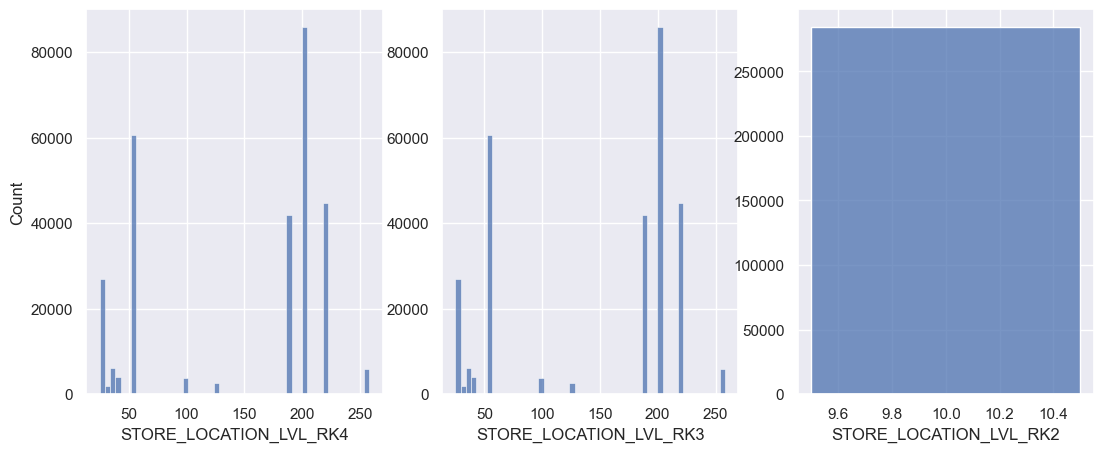

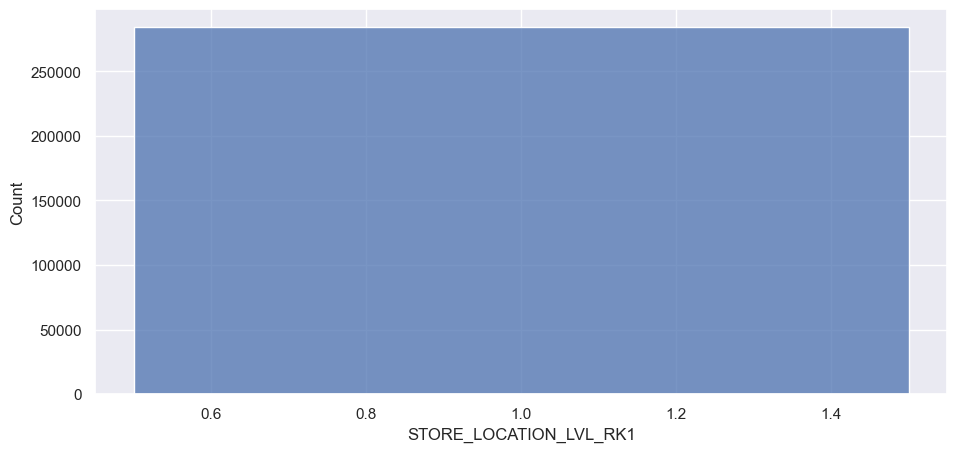

In [9]:
mass_hist_plot(filtered_merged, ['STORE_LOCATION_LVL_RK4', 'STORE_LOCATION_LVL_RK3', 'STORE_LOCATION_LVL_RK2', 'STORE_LOCATION_LVL_RK1'])

In [10]:
def quick_boxplot(df: pd.core.frame.DataFrame, qual: str, target: str, vertical=False, ylim=0, dm1=10, dm2=6):
    fig, ax = plt.subplots(figsize=(dm1, dm2))

    sns.boxplot(x=qual, y=target, data=df, ax=ax)
    plt.ticklabel_format(style='plain', axis='y',useOffset=False)
    if ylim:
        plt.ylim(0, ylim)
    
    if vertical:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

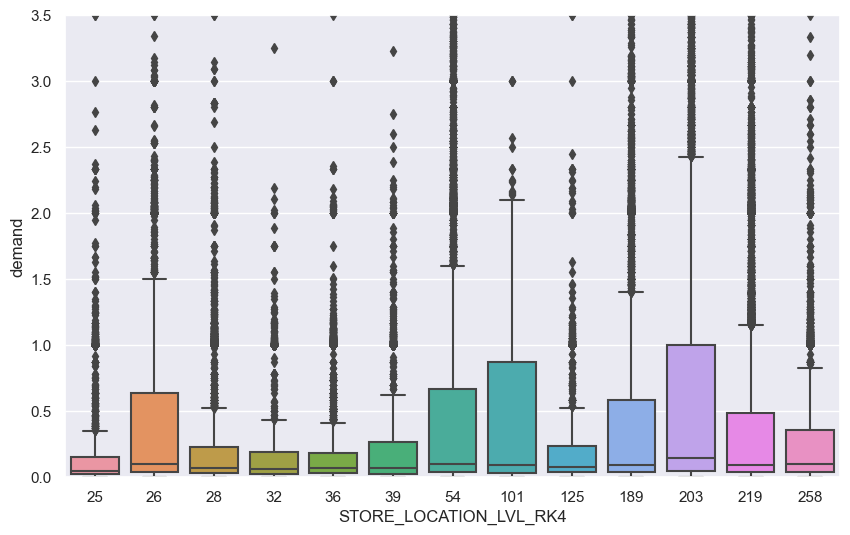

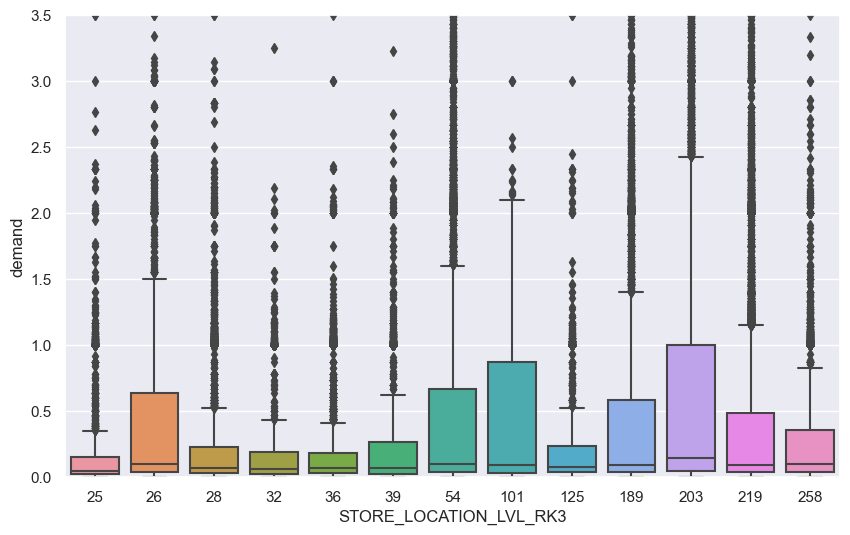

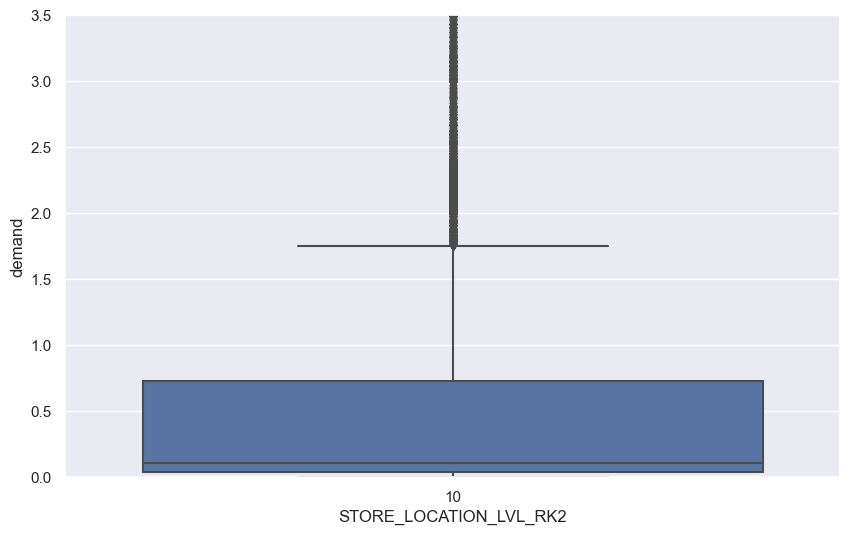

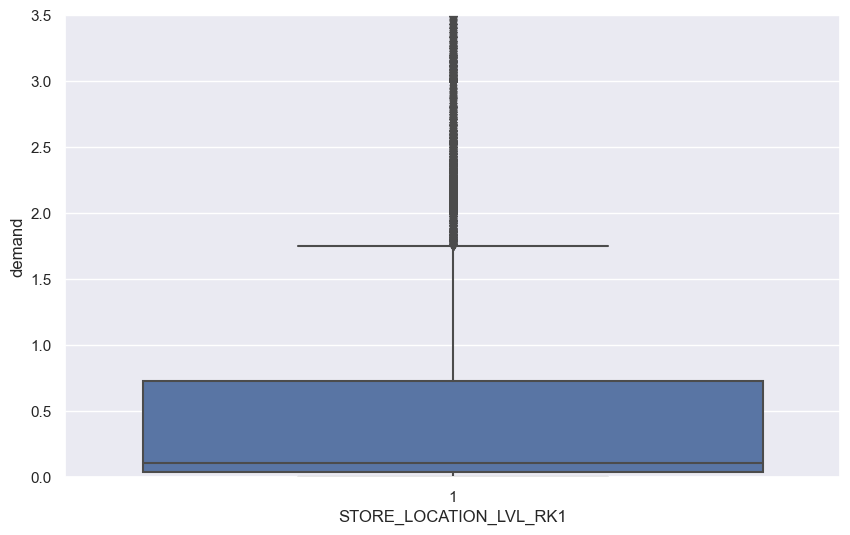

In [11]:
for col in ['STORE_LOCATION_LVL_RK4', 'STORE_LOCATION_LVL_RK3', 'STORE_LOCATION_LVL_RK2', 'STORE_LOCATION_LVL_RK1']:
    quick_boxplot(filtered_merged, col, 'demand', vertical=False, ylim=3.5)

In [12]:
def dataframe_new_stats(df: pd.DataFrame) -> pd.DataFrame:
    return pd.concat([df.isnull().sum().rename('null'), (df.isnull().sum() / df.shape[0] * 100).rename('%null'), \
        (df == 0).sum().rename('zero'), ((df == 0).sum() / df.shape[0] * 100).rename('%zero'), df.nunique().rename('unique')], axis=1)

- drop bullshit 
- filter features as has been advised(VALID_FROM_* are useless, according to the supervisor)
- drop duplicate id vars

In [13]:
filtered_merged

,period_dt,location_id,product_id,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,id,STORE_LOCATION_RK,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2,STORE_LOCATION_LVL_RK1,STORE_OPEN_DTTM,STORE_CLOSURE_DTTM,VALID_FROM_DTTM_x,VALID_TO_DTTM_x,PROCESSED_DTTM_x,PRODUCT_RK,PRODUCT_LVL_RK6,PRODUCT_LVL_RK5,PRODUCT_LVL_RK4,PRODUCT_LVL_RK3,PRODUCT_LVL_RK2,PRODUCT_LVL_RK1,SALES_INTRODUCTION_DT,SALES_DISCONTINUED_DT,VALID_FROM_DTTM_y,VALID_TO_DTTM_y,PROCESSED_DTTM_y
0,2019-12-30,425.0,22939.0,NaN,0.0,0.0,3649.0,2736.75,0.0,0.0,1,425,203,203,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,22939,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,01Jan5999:00:00:00,03Jan2020:07:01:13
1,2017-01-02,425.0,22939.0,0.005479,1.0,0.0,3399.0,2549.25,0.0,1.0,75,425,203,203,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,22939,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,01Jan5999:00:00:00,03Jan2020:07:01:13
2,2017-02-27,425.0,22939.0,1.000000,1.0,0.0,3399.0,2549.25,0.0,1.0,76,425,203,203,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,22939,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,01Jan5999:00:00:00,03Jan2020:07:01:13
3,2017-03-20,425.0,22939.0,0.002740,0.0,0.0,3399.0,2549.25,0.0,1.0,77,425,203,203,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,22939,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,01Jan5999:00:00:00,03Jan2020:07:01:13
4,2018-01-01,425.0,22939.0,0.002740,1.0,0.0,3399.0,2549.25,0.0,1.0,78,425,203,203,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,22939,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,01Jan5999:00:00:00,03Jan2020:07:01:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284114,2017-12-04,555.0,40696.0,0.023973,0.0,0.0,1499.0,974.39,0.0,0.0,263653,555,258,258,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,40696,4288,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,01Jan5999:00:00:00,03Jan2020:07:01:13
284115,2017-12-11,555.0,40696.0,0.020548,0.0,0.0,1499.0,974.39,0.0,0.0,263654,555,258,258,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,40696,4288,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,01Jan5999:00:00:00,03Jan2020:07:01:13
284116,2018-01-01,555.0,40696.0,0.013699,1.0,0.0,1499.0,974.39,0.0,0.0,263655,555,258,258,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,40696,4288,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,01Jan5999:00:00:00,03Jan2020:07:01:13
284117,2018-01-08,555.0,40696.0,0.023973,0.0,0.0,1499.0,974.39,0.0,0.0,263656,555,258,258,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,40696,4288,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,01Jan5999:00:00:00,03Jan2020:07:01:13


In [14]:
dataframe_new_stats(filtered_merged)

,null,%null,zero,%zero,unique
period_dt,0,0.000000,0,0.000000,156
location_id,0,0.000000,0,0.000000,41
product_id,0,0.000000,0,0.000000,2140
demand,9648,3.395760,5238,1.843594,16291
PROMO1_FLAG,1797,0.632481,163979,57.714901,4
PROMO2_FLAG,1797,0.632481,281604,99.114808,2
PRICE_REGULAR,6819,2.400051,0,0.000000,2717
PRICE_AFTER_DISC,8435,2.968826,0,0.000000,13080
NUM_CONSULTANT,1797,0.632481,259352,91.282878,11
AUTORIZATION_FLAG,1797,0.632481,35524,12.503212,2


In [15]:
filtered_merged2 = filtered_merged.drop(['STORE_LOCATION_LVL_RK3', 'STORE_LOCATION_LVL_RK2', 'STORE_LOCATION_LVL_RK1', 'STORE_LOCATION_RK', 'PRODUCT_LVL_RK4',\
    'VALID_FROM_DTTM_y', 'VALID_FROM_DTTM_x', 'PRODUCT_LVL_RK3', 'PRODUCT_LVL_RK2', 'PRODUCT_LVL_RK1', 'PRODUCT_RK', 'PRODUCT_LVL_RK5',\
    'VALID_TO_DTTM_y', 'VALID_TO_DTTM_x'], axis=1, inplace=False)

filtered_merged2.head(10)

,period_dt,location_id,product_id,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,id,STORE_LOCATION_LVL_RK4,STORE_OPEN_DTTM,STORE_CLOSURE_DTTM,PROCESSED_DTTM_x,PRODUCT_LVL_RK6,SALES_INTRODUCTION_DT,SALES_DISCONTINUED_DT,PROCESSED_DTTM_y
0,2019-12-30,425.0,22939.0,NaN,0.0,0.0,3649.000000,2736.750000,0.0,0.0,1,203,NaN,NaN,03Jan2020:07:00:25,3876,NaN,NaN,03Jan2020:07:01:13
1,2017-01-02,425.0,22939.0,0.005479,1.0,0.0,3399.000000,2549.250000,0.0,1.0,75,203,NaN,NaN,03Jan2020:07:00:25,3876,NaN,NaN,03Jan2020:07:01:13
2,2017-02-27,425.0,22939.0,1.000000,1.0,0.0,3399.000000,2549.250000,0.0,1.0,76,203,NaN,NaN,03Jan2020:07:00:25,3876,NaN,NaN,03Jan2020:07:01:13
3,2017-03-20,425.0,22939.0,0.002740,0.0,0.0,3399.000000,2549.250000,0.0,1.0,77,203,NaN,NaN,03Jan2020:07:00:25,3876,NaN,NaN,03Jan2020:07:01:13
4,2018-01-01,425.0,22939.0,0.002740,1.0,0.0,3399.000000,2549.250000,0.0,1.0,78,203,NaN,NaN,03Jan2020:07:00:25,3876,NaN,NaN,03Jan2020:07:01:13
5,2018-01-08,425.0,22939.0,1.021918,0.0,0.0,3506.142857,2629.607143,0.0,1.0,79,203,NaN,NaN,03Jan2020:07:00:25,3876,NaN,NaN,03Jan2020:07:01:13
6,2018-01-15,425.0,22939.0,0.022152,0.0,0.0,3549.000000,2661.750000,0.0,1.0,80,203,NaN,NaN,03Jan2020:07:00:25,3876,NaN,NaN,03Jan2020:07:01:13
7,2018-01-22,425.0,22939.0,0.022152,0.0,0.0,3549.000000,2661.750000,0.0,1.0,81,203,NaN,NaN,03Jan2020:07:00:25,3876,NaN,NaN,03Jan2020:07:01:13
8,2018-01-29,425.0,22939.0,0.022152,0.0,0.0,3549.000000,2661.750000,0.0,1.0,82,203,NaN,NaN,03Jan2020:07:00:25,3876,NaN,NaN,03Jan2020:07:01:13
9,2018-02-05,425.0,22939.0,0.022152,0.0,0.0,3549.000000,2661.750000,0.0,1.0,83,203,NaN,NaN,03Jan2020:07:00:25,3876,NaN,NaN,03Jan2020:07:01:13


In [16]:
filtered_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284119 entries, 0 to 284118
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   period_dt               284119 non-null  object 
 1   location_id             284119 non-null  float64
 2   product_id              284119 non-null  float64
 3   demand                  274471 non-null  float64
 4   PROMO1_FLAG             282322 non-null  float64
 5   PROMO2_FLAG             282322 non-null  float64
 6   PRICE_REGULAR           277300 non-null  float64
 7   PRICE_AFTER_DISC        275684 non-null  float64
 8   NUM_CONSULTANT          282322 non-null  float64
 9   AUTORIZATION_FLAG       282322 non-null  float64
 10  id                      284119 non-null  int64  
 11  STORE_LOCATION_LVL_RK4  284119 non-null  int64  
 12  STORE_OPEN_DTTM         0 non-null       float64
 13  STORE_CLOSURE_DTTM      0 non-null       float64
 14  PROCESSED_DTTM_x    

давайте попробуем забить ъуй на процесед дттм у и х

In [17]:
filtered_merged2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
location_id,284119.0,890.839272,345.164840,309.00,557.000000,866.000000,1281.000000,1380.0
product_id,284119.0,61258.891134,29479.333831,22939.00,32992.000000,62265.000000,88978.000000,149522.0
demand,274471.0,0.418661,0.725600,0.00,0.038356,0.103395,0.724179,48.0
PROMO1_FLAG,282322.0,0.431851,0.521027,0.00,0.000000,0.000000,1.000000,3.0
PROMO2_FLAG,282322.0,0.002543,0.050366,0.00,0.000000,0.000000,0.000000,1.0
PRICE_REGULAR,277300.0,3339.702162,948.033836,369.00,2849.000000,3499.000000,3875.000000,13149.0
PRICE_AFTER_DISC,275684.0,2217.637963,686.628112,4.96,1749.500000,2159.400000,2651.471429,11049.0
NUM_CONSULTANT,282322.0,0.371370,1.301605,0.00,0.000000,0.000000,0.000000,11.0
AUTORIZATION_FLAG,282322.0,0.874172,0.331656,0.00,1.000000,1.000000,1.000000,1.0
id,284119.0,144507.864743,83636.240006,1.00,72056.500000,144024.000000,217644.500000,288674.0


In [18]:
filtered_merged3 = filtered_merged2.drop(['STORE_CLOSURE_DTTM', 'STORE_OPEN_DTTM', 'SALES_INTRODUCTION_DT', 'SALES_DISCONTINUED_DT'], axis=1, inplace=False)

filtered_merged3.head(10)

,period_dt,location_id,product_id,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,id,STORE_LOCATION_LVL_RK4,PROCESSED_DTTM_x,PRODUCT_LVL_RK6,PROCESSED_DTTM_y
0,2019-12-30,425.0,22939.0,NaN,0.0,0.0,3649.000000,2736.750000,0.0,0.0,1,203,03Jan2020:07:00:25,3876,03Jan2020:07:01:13
1,2017-01-02,425.0,22939.0,0.005479,1.0,0.0,3399.000000,2549.250000,0.0,1.0,75,203,03Jan2020:07:00:25,3876,03Jan2020:07:01:13
2,2017-02-27,425.0,22939.0,1.000000,1.0,0.0,3399.000000,2549.250000,0.0,1.0,76,203,03Jan2020:07:00:25,3876,03Jan2020:07:01:13
3,2017-03-20,425.0,22939.0,0.002740,0.0,0.0,3399.000000,2549.250000,0.0,1.0,77,203,03Jan2020:07:00:25,3876,03Jan2020:07:01:13
4,2018-01-01,425.0,22939.0,0.002740,1.0,0.0,3399.000000,2549.250000,0.0,1.0,78,203,03Jan2020:07:00:25,3876,03Jan2020:07:01:13
5,2018-01-08,425.0,22939.0,1.021918,0.0,0.0,3506.142857,2629.607143,0.0,1.0,79,203,03Jan2020:07:00:25,3876,03Jan2020:07:01:13
6,2018-01-15,425.0,22939.0,0.022152,0.0,0.0,3549.000000,2661.750000,0.0,1.0,80,203,03Jan2020:07:00:25,3876,03Jan2020:07:01:13
7,2018-01-22,425.0,22939.0,0.022152,0.0,0.0,3549.000000,2661.750000,0.0,1.0,81,203,03Jan2020:07:00:25,3876,03Jan2020:07:01:13
8,2018-01-29,425.0,22939.0,0.022152,0.0,0.0,3549.000000,2661.750000,0.0,1.0,82,203,03Jan2020:07:00:25,3876,03Jan2020:07:01:13
9,2018-02-05,425.0,22939.0,0.022152,0.0,0.0,3549.000000,2661.750000,0.0,1.0,83,203,03Jan2020:07:00:25,3876,03Jan2020:07:01:13


In [19]:
dataframe_new_stats(filtered_merged3)

,null,%null,zero,%zero,unique
period_dt,0,0.000000,0,0.000000,156
location_id,0,0.000000,0,0.000000,41
product_id,0,0.000000,0,0.000000,2140
demand,9648,3.395760,5238,1.843594,16291
PROMO1_FLAG,1797,0.632481,163979,57.714901,4
PROMO2_FLAG,1797,0.632481,281604,99.114808,2
PRICE_REGULAR,6819,2.400051,0,0.000000,2717
PRICE_AFTER_DISC,8435,2.968826,0,0.000000,13080
NUM_CONSULTANT,1797,0.632481,259352,91.282878,11
AUTORIZATION_FLAG,1797,0.632481,35524,12.503212,2


PROCESSED_DTTM_* are literally useless

In [20]:
filtered_merged4 = filtered_merged3.drop(['PROCESSED_DTTM_y', 'PROCESSED_DTTM_x'], axis=1, inplace=False)

filtered_merged4.head(10)

,period_dt,location_id,product_id,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,id,STORE_LOCATION_LVL_RK4,PRODUCT_LVL_RK6
0,2019-12-30,425.0,22939.0,NaN,0.0,0.0,3649.000000,2736.750000,0.0,0.0,1,203,3876
1,2017-01-02,425.0,22939.0,0.005479,1.0,0.0,3399.000000,2549.250000,0.0,1.0,75,203,3876
2,2017-02-27,425.0,22939.0,1.000000,1.0,0.0,3399.000000,2549.250000,0.0,1.0,76,203,3876
3,2017-03-20,425.0,22939.0,0.002740,0.0,0.0,3399.000000,2549.250000,0.0,1.0,77,203,3876
4,2018-01-01,425.0,22939.0,0.002740,1.0,0.0,3399.000000,2549.250000,0.0,1.0,78,203,3876
5,2018-01-08,425.0,22939.0,1.021918,0.0,0.0,3506.142857,2629.607143,0.0,1.0,79,203,3876
6,2018-01-15,425.0,22939.0,0.022152,0.0,0.0,3549.000000,2661.750000,0.0,1.0,80,203,3876
7,2018-01-22,425.0,22939.0,0.022152,0.0,0.0,3549.000000,2661.750000,0.0,1.0,81,203,3876
8,2018-01-29,425.0,22939.0,0.022152,0.0,0.0,3549.000000,2661.750000,0.0,1.0,82,203,3876
9,2018-02-05,425.0,22939.0,0.022152,0.0,0.0,3549.000000,2661.750000,0.0,1.0,83,203,3876


In [21]:
filtered_merged4.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
location_id,284119.0,890.839272,345.164840,309.00,557.000000,866.000000,1281.000000,1380.0
product_id,284119.0,61258.891134,29479.333831,22939.00,32992.000000,62265.000000,88978.000000,149522.0
demand,274471.0,0.418661,0.725600,0.00,0.038356,0.103395,0.724179,48.0
PROMO1_FLAG,282322.0,0.431851,0.521027,0.00,0.000000,0.000000,1.000000,3.0
PROMO2_FLAG,282322.0,0.002543,0.050366,0.00,0.000000,0.000000,0.000000,1.0
PRICE_REGULAR,277300.0,3339.702162,948.033836,369.00,2849.000000,3499.000000,3875.000000,13149.0
PRICE_AFTER_DISC,275684.0,2217.637963,686.628112,4.96,1749.500000,2159.400000,2651.471429,11049.0
NUM_CONSULTANT,282322.0,0.371370,1.301605,0.00,0.000000,0.000000,0.000000,11.0
AUTORIZATION_FLAG,282322.0,0.874172,0.331656,0.00,1.000000,1.000000,1.000000,1.0
id,284119.0,144507.864743,83636.240006,1.00,72056.500000,144024.000000,217644.500000,288674.0


In [22]:
dataframe_new_stats(filtered_merged4)

,null,%null,zero,%zero,unique
period_dt,0,0.000000,0,0.000000,156
location_id,0,0.000000,0,0.000000,41
product_id,0,0.000000,0,0.000000,2140
demand,9648,3.395760,5238,1.843594,16291
PROMO1_FLAG,1797,0.632481,163979,57.714901,4
PROMO2_FLAG,1797,0.632481,281604,99.114808,2
PRICE_REGULAR,6819,2.400051,0,0.000000,2717
PRICE_AFTER_DISC,8435,2.968826,0,0.000000,13080
NUM_CONSULTANT,1797,0.632481,259352,91.282878,11
AUTORIZATION_FLAG,1797,0.632481,35524,12.503212,2


In [23]:
qualitative = ['PRODUCT_LVL_RK6', 'STORE_LOCATION_LVL_RK4', 'AUTORIZATION_FLAG', 'NUM_CONSULTANT', 'PROMO2_FLAG', 'PROMO1_FLAG']

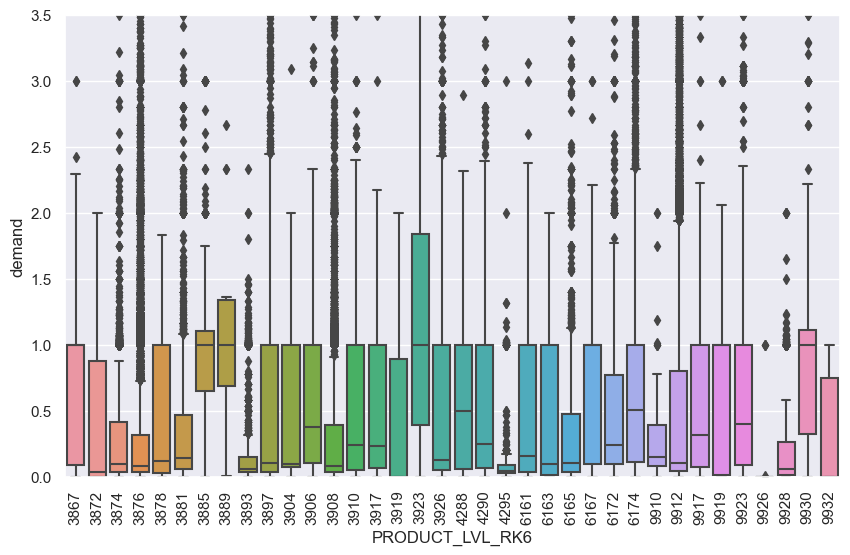

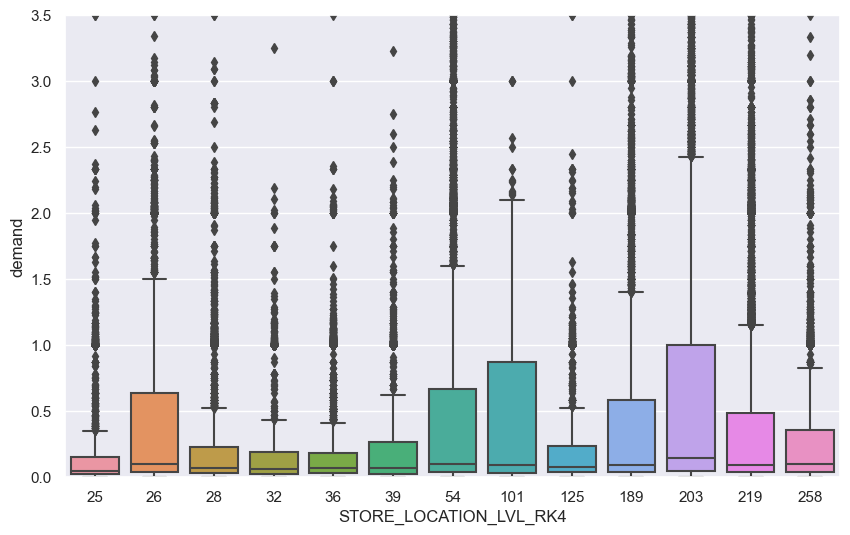

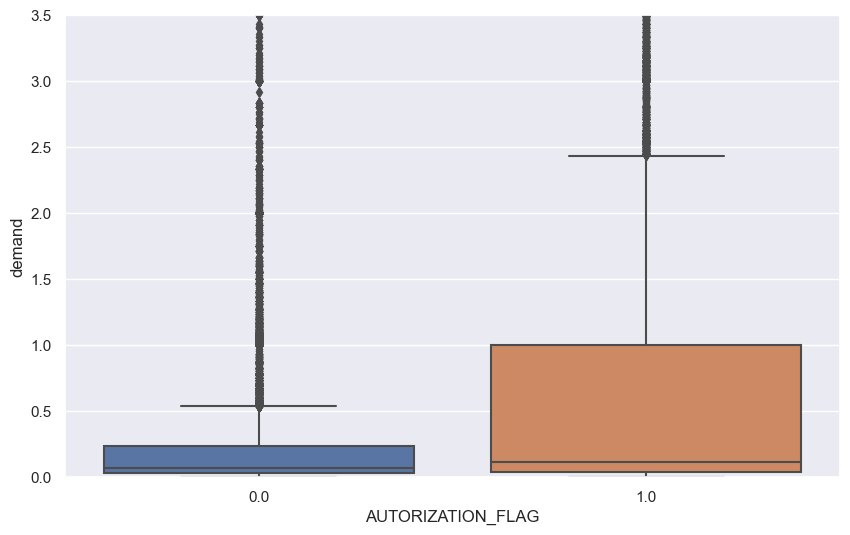

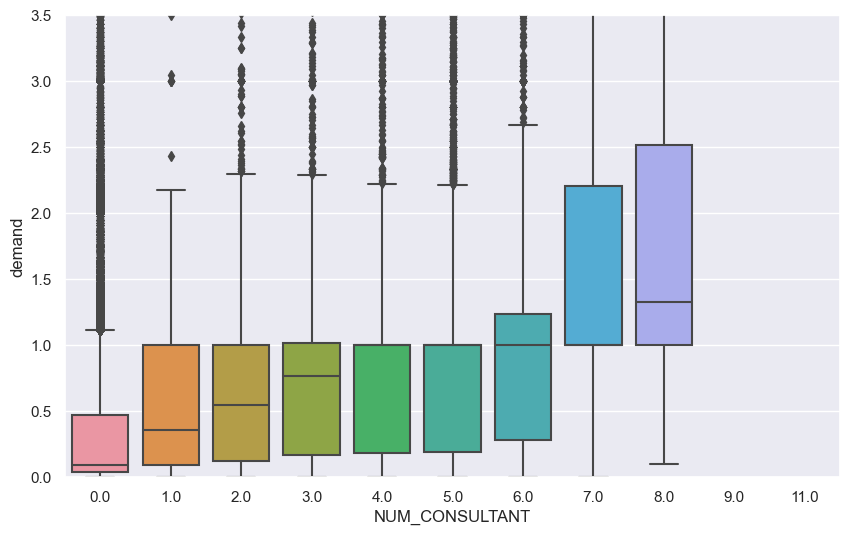

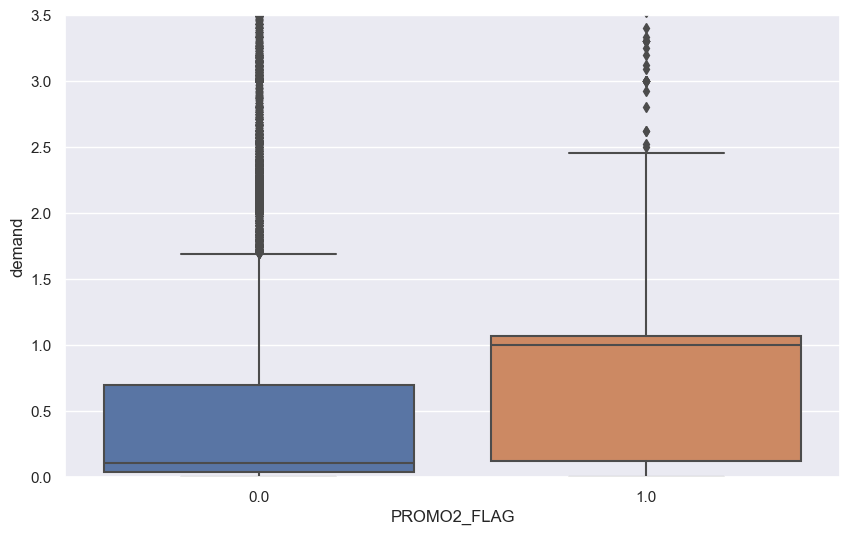

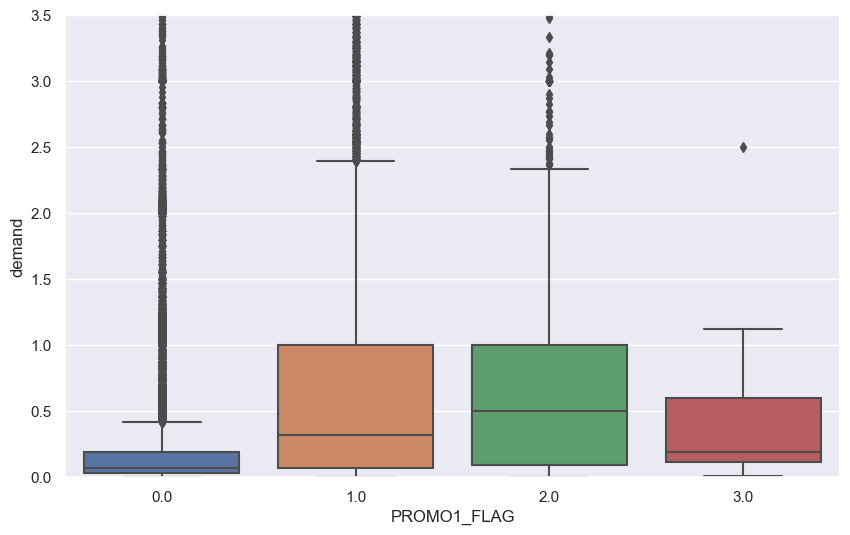

In [24]:
for col in qualitative:
    quick_boxplot(filtered_merged4, col, 'demand', vertical=col=='PRODUCT_LVL_RK6', ylim=3.5)

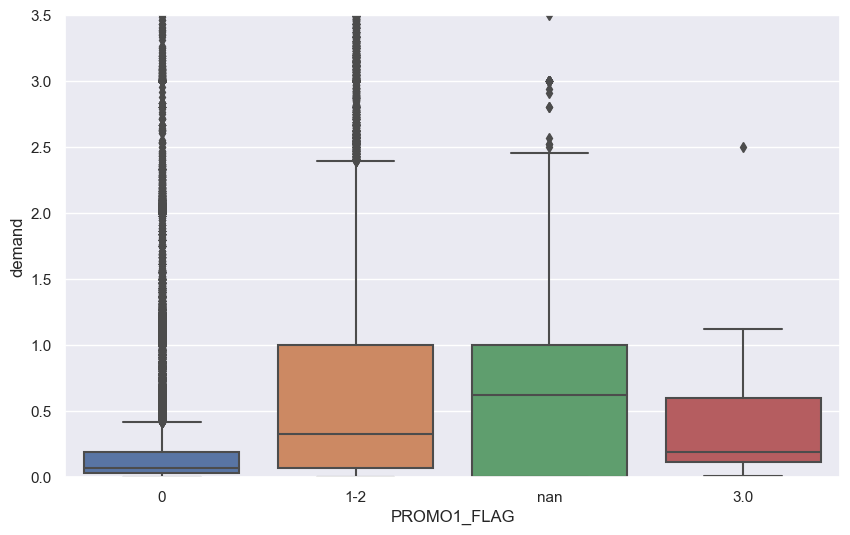

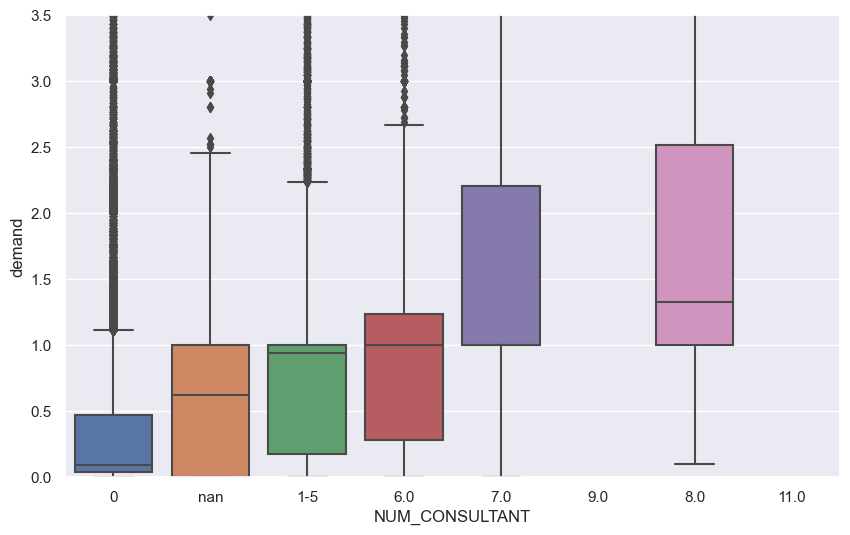

In [25]:
binned = filtered_merged4.copy()

binned['PROMO1_FLAG'] = filtered_merged4['PROMO1_FLAG'].apply(lambda x: '0' if x == 0 else ('1-2' if x == 1 or x == 2 else str(x)))
binned['NUM_CONSULTANT'] = filtered_merged4['NUM_CONSULTANT'].apply(lambda x: '0' if x == 0 else ('1-5' if x >= 1 and x <= 5 else str(x)))

for col in ['PROMO1_FLAG', 'NUM_CONSULTANT']:
    quick_boxplot(binned, col, 'demand', ylim=3.5)


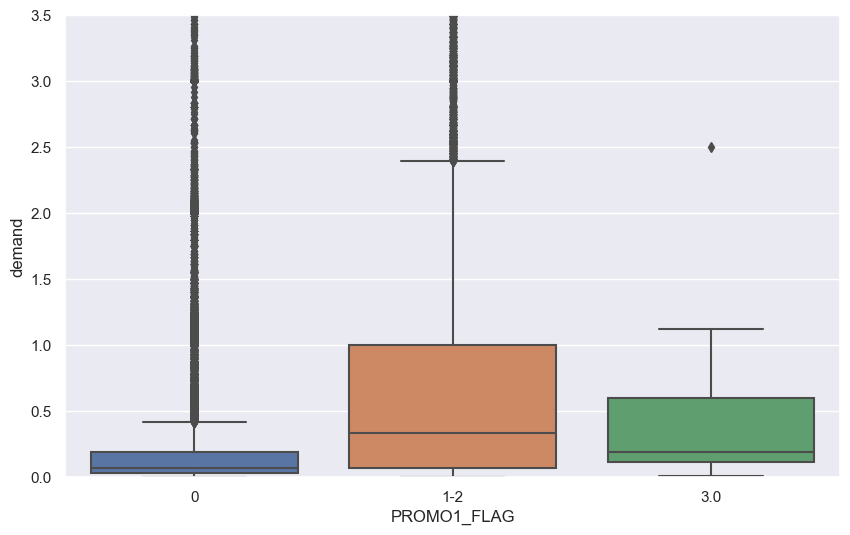

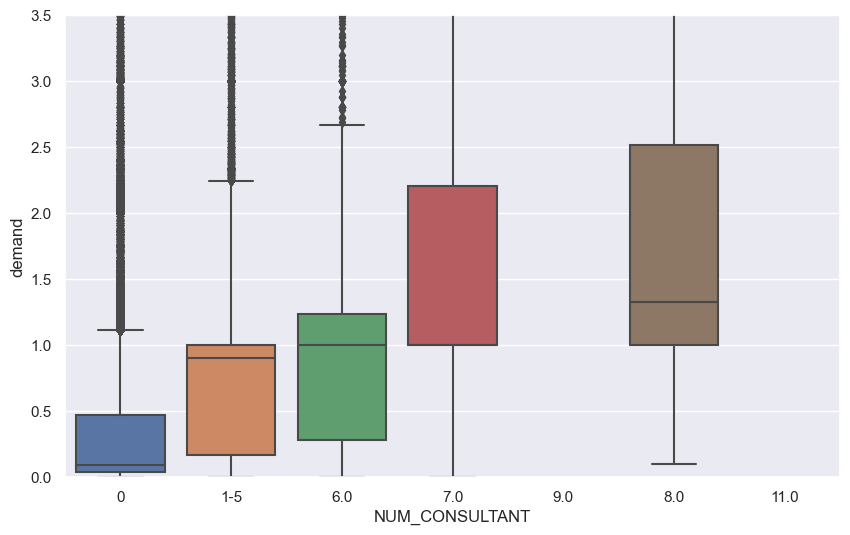

In [26]:
binned['PROMO1_FLAG'] = binned['PROMO1_FLAG'].apply(lambda x: '1-2' if x == 'nan' else x)
binned['NUM_CONSULTANT'] = binned['NUM_CONSULTANT'].apply(lambda x: '1-5' if x == 'nan' else x)

for col in ['PROMO1_FLAG', 'NUM_CONSULTANT']:
    quick_boxplot(binned, col, 'demand', ylim=3.5)

In [28]:
dataframe_new_stats(binned)

,null,%null,zero,%zero,unique
period_dt,0,0.000000,0,0.000000,156
location_id,0,0.000000,0,0.000000,41
product_id,0,0.000000,0,0.000000,2140
demand,9648,3.395760,5238,1.843594,16291
PROMO1_FLAG,0,0.000000,0,0.000000,3
PROMO2_FLAG,1797,0.632481,281604,99.114808,2
PRICE_REGULAR,6819,2.400051,0,0.000000,2717
PRICE_AFTER_DISC,8435,2.968826,0,0.000000,13080
NUM_CONSULTANT,0,0.000000,0,0.000000,7
AUTORIZATION_FLAG,1797,0.632481,35524,12.503212,2


In [170]:
price_cleared = binned.dropna(subset=['PRICE_REGULAR', 'PRICE_AFTER_DISC']).copy()
price_cleared['period_dt'] = pd.to_datetime(price_cleared['period_dt'])
dataframe_new_stats(price_cleared)

,null,%null,zero,%zero,unique
period_dt,0,0.000000,0,0.000000,155
location_id,0,0.000000,0,0.000000,40
product_id,0,0.000000,0,0.000000,1960
demand,9353,3.392652,103,0.037362,16284
PROMO1_FLAG,0,0.000000,0,0.000000,3
PROMO2_FLAG,0,0.000000,275025,99.760958,2
PRICE_REGULAR,0,0.000000,0,0.000000,2717
PRICE_AFTER_DISC,0,0.000000,0,0.000000,13080
NUM_CONSULTANT,0,0.000000,0,0.000000,7
AUTORIZATION_FLAG,0,0.000000,35356,12.824828,2


In [171]:
for i in price_cleared['PROMO1_FLAG'].unique():
    print(f"{i}: {len(price_cleared[price_cleared['PROMO1_FLAG'] == i])}")

for i in price_cleared['PROMO2_FLAG'].unique():
    print(f"{i}: {len(price_cleared[price_cleared['PROMO2_FLAG'] == i])}")

0: 160588
1-2: 114990
3.0: 106
0.0: 275025
1.0: 659


it seems reasonable to get rid of the extremely rare labels(<=0.2% of entries actually containing this label), thus we scrap 'PROMO2_FLAG' altogether and shove the label '3' into the '1-2' bin.

In [172]:
price_cleared['PROMO1_FLAG'] = price_cleared['PROMO1_FLAG'].apply(lambda x: '1-3' if x == '1-2' or x == '3.0' else x)
price_cleared.drop(['PROMO2_FLAG'], axis=1, inplace=True)

In [173]:
for i in price_cleared['PROMO1_FLAG'].unique():
    print(f"{i}: {len(price_cleared[price_cleared['PROMO1_FLAG'] == i])}")

0: 160588
1-3: 115096


In [174]:
price_cleared[price_cleared['product_id'] == 77229].sort_values('period_dt')

,period_dt,location_id,product_id,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,id,STORE_LOCATION_LVL_RK4,PRODUCT_LVL_RK6
116256,2016-12-26,798.0,77229.0,1.000000,1-3,3499.000000,2624.250000,0,1.0,124239,203,9923
116282,2017-01-02,1034.0,77229.0,0.006494,1-3,3399.000000,2549.250000,0,1.0,124252,203,9923
116286,2017-05-15,540.0,77229.0,1.000000,0,3499.000000,2799.200000,0,1.0,124207,26,9923
116283,2017-08-07,1034.0,77229.0,1.000000,0,3456.142857,2592.107143,0,1.0,124253,203,9923
116287,2017-08-14,540.0,77229.0,1.005479,0,3499.000000,2749.214286,0,1.0,124208,26,9923
...,...,...,...,...,...,...,...,...,...,...,...,...
116285,2019-12-23,1191.0,77229.0,NaN,0,3649.000000,2189.400000,0,1.0,124189,28,9923
116107,2019-12-30,764.0,77229.0,NaN,0,3649.000000,2189.400000,0,1.0,124186,219,9923
116122,2019-12-30,1281.0,77229.0,NaN,0,3649.000000,2736.750000,0,1.0,124191,203,9923
116012,2019-12-30,525.0,77229.0,NaN,0,3649.000000,2371.850000,0,1.0,124180,54,9923


In [175]:
weekd = price_cleared.copy()

weekd['period_dt'] = weekd['period_dt'] - pd.to_timedelta(weekd['period_dt'].dt.weekday, unit='D')
weekd.head(10).sort_values(by='period_dt')

,period_dt,location_id,product_id,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,id,STORE_LOCATION_LVL_RK4,PRODUCT_LVL_RK6
1,2017-01-02,425.0,22939.0,0.005479,1-3,3399.000000,2549.250000,0,1.0,75,203,3876
2,2017-02-27,425.0,22939.0,1.000000,1-3,3399.000000,2549.250000,0,1.0,76,203,3876
3,2017-03-20,425.0,22939.0,0.002740,0,3399.000000,2549.250000,0,1.0,77,203,3876
4,2018-01-01,425.0,22939.0,0.002740,1-3,3399.000000,2549.250000,0,1.0,78,203,3876
5,2018-01-08,425.0,22939.0,1.021918,0,3506.142857,2629.607143,0,1.0,79,203,3876
6,2018-01-15,425.0,22939.0,0.022152,0,3549.000000,2661.750000,0,1.0,80,203,3876
7,2018-01-22,425.0,22939.0,0.022152,0,3549.000000,2661.750000,0,1.0,81,203,3876
8,2018-01-29,425.0,22939.0,0.022152,0,3549.000000,2661.750000,0,1.0,82,203,3876
9,2018-02-05,425.0,22939.0,0.022152,0,3549.000000,2661.750000,0,1.0,83,203,3876
0,2019-12-30,425.0,22939.0,NaN,0,3649.000000,2736.750000,0,0.0,1,203,3876


### chapter 2: feature engineering

**ideas:**
- demand average over a category on a particular week
- ratio of price to average price of products from the same category
- discount percentage
- demand in the past(can use pacf)
- account for seasonality(granular date features?)

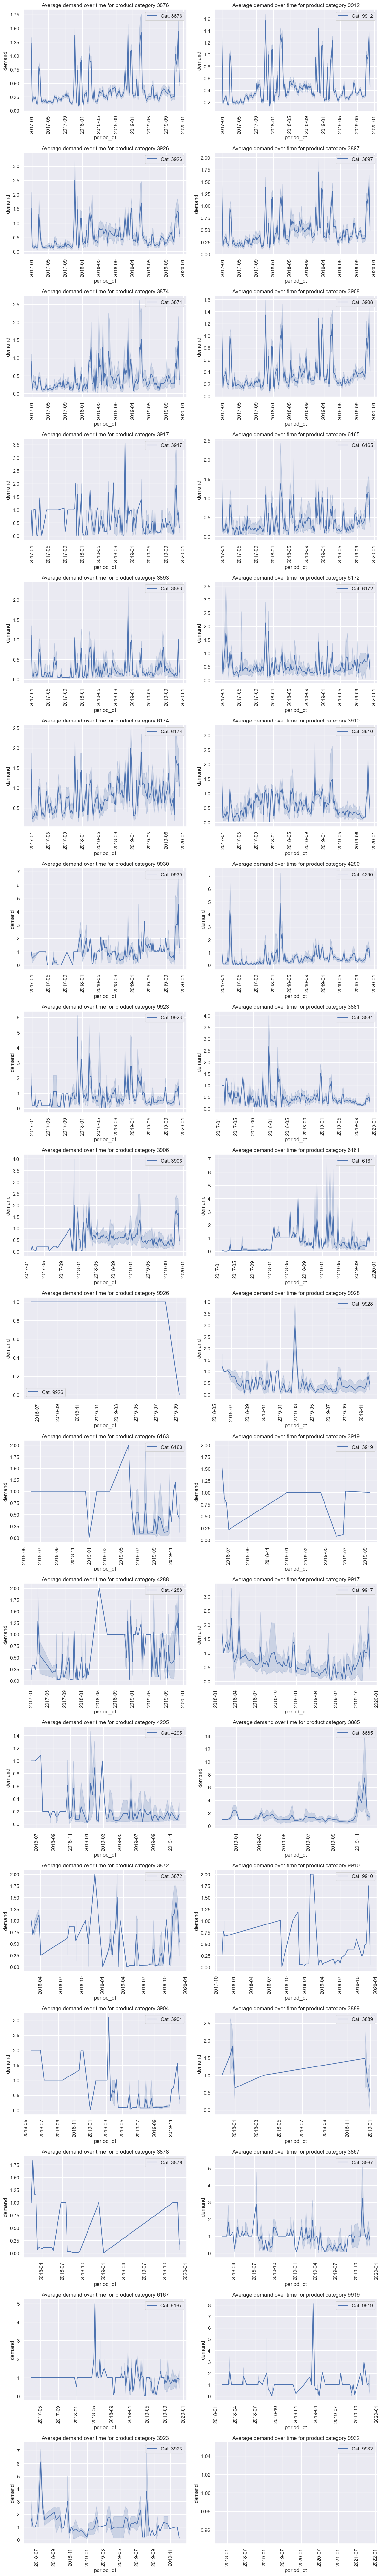

In [209]:
fig, ax = plt.subplots(figsize=(12, 80), nrows=18, ncols=2)
ax = ax.flatten()
counter = 0

for dix in weekd['PRODUCT_LVL_RK6'].unique():

    sns.lineplot(data=weekd[weekd['PRODUCT_LVL_RK6'] == dix], x='period_dt', y='demand', estimator='mean', ax=ax[counter], label=f"Cat. {dix}")
    ax[counter].tick_params(axis='x', rotation=90)
    ax[counter].set_title(f"Average demand over time for product category {dix}")
    counter += 1

plt.tight_layout()

In [177]:
acfs = []
pacfs = []

for dix in weekd['PRODUCT_LVL_RK6'].unique():
    pacfs.append(np.array(sm2.tsa.stattools.pacf(weekd[weekd['PRODUCT_LVL_RK6'] == dix].dropna().groupby(by='period_dt')['demand'].mean())))
    acfs.append(np.array(sm2.tsa.stattools.acf(weekd[weekd['PRODUCT_LVL_RK6'] == dix].dropna().groupby(by='period_dt')['demand'].mean())))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]


In [178]:
acf_avg = np.mean([x[:15] for x in acfs if x.size >= 15], axis=0)
pacf_avg = np.mean([x[:15] for x in pacfs if x.size >= 15], axis=0)

<Figure size 1200x600 with 0 Axes>

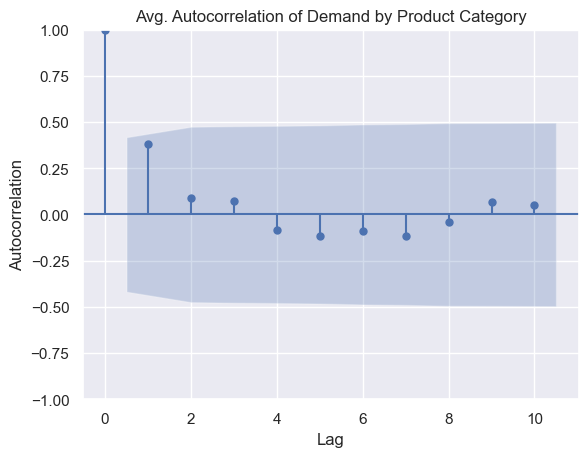

In [179]:
acfdemand = sm2.tsa.stattools.acf(weekd.dropna().groupby(by='period_dt')['demand'].mean())

plt.figure(figsize=(12, 6))
sm2.graphics.tsa.plot_acf(acfdemand, lags=10, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Avg. Autocorrelation of Demand by Product Category')
plt.grid(True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

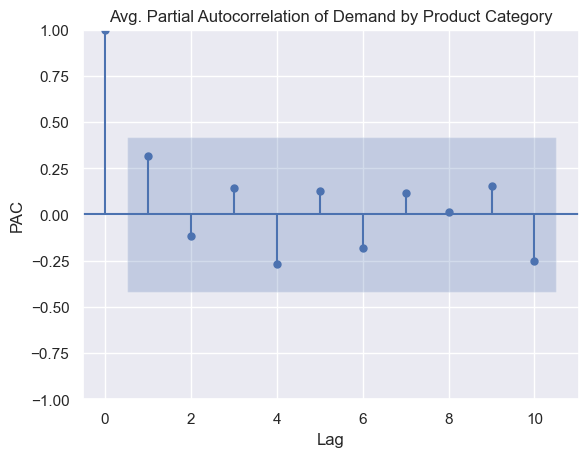

In [180]:
plt.figure(figsize=(12, 6))
sm2.graphics.tsa.plot_pacf(pacfdemand, lags=10, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('PAC')
plt.title('Avg. Partial Autocorrelation of Demand by Product Category')
plt.grid(True)
plt.show()

In [196]:
doydf = weekd.copy()

doydf['week'] = doydf['period_dt'].dt.weekofyear
doydf['month'] = doydf['period_dt'].dt.month
doydf['year'] = doydf['period_dt'].dt.year
doydf.drop(['period_dt'], axis=1, inplace=True)

doydf['location_id'] = doydf['location_id'].astype(str)
doydf['product_id'] = doydf['product_id'].astype(str)
doydf['AUTORIZATION_FLAG'] = doydf['AUTORIZATION_FLAG'].astype(str)
doydf['STORE_LOCATION_LVL_RK4'] = doydf['STORE_LOCATION_LVL_RK4'].astype(str)
doydf['PRODUCT_LVL_RK6'] = doydf['PRODUCT_LVL_RK6'].astype(str)

/var/folders/54/sdchpz1d0cd6rp15x31xtjlh0000gn/T/ipykernel_71170/1577894402.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  doydf['week'] = doydf['period_dt'].dt.weekofyear


In [197]:
doydf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275684 entries, 0 to 284118
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   location_id             275684 non-null  object 
 1   product_id              275684 non-null  object 
 2   demand                  266331 non-null  float64
 3   PROMO1_FLAG             275684 non-null  object 
 4   PRICE_REGULAR           275684 non-null  float64
 5   PRICE_AFTER_DISC        275684 non-null  float64
 6   NUM_CONSULTANT          275684 non-null  object 
 7   AUTORIZATION_FLAG       275684 non-null  object 
 8   id                      275684 non-null  int64  
 9   STORE_LOCATION_LVL_RK4  275684 non-null  object 
 10  PRODUCT_LVL_RK6         275684 non-null  object 
 11  week                    275684 non-null  int64  
 12  month                   275684 non-null  int64  
 13  year                    275684 non-null  int64  
dtypes: float64(3), int64

In [198]:
dataframe_new_stats(doydf)

,null,%null,zero,%zero,unique
location_id,0,0.000000,0,0.000000,40
product_id,0,0.000000,0,0.000000,1960
demand,9353,3.392652,103,0.037362,16284
PROMO1_FLAG,0,0.000000,0,0.000000,2
PRICE_REGULAR,0,0.000000,0,0.000000,2717
PRICE_AFTER_DISC,0,0.000000,0,0.000000,13080
NUM_CONSULTANT,0,0.000000,0,0.000000,7
AUTORIZATION_FLAG,0,0.000000,0,0.000000,2
id,0,0.000000,0,0.000000,275684
STORE_LOCATION_LVL_RK4,0,0.000000,0,0.000000,13


### chapter 3: ML models

we finna roll with CatBoost.

In [201]:
variableset = set(doydf.columns) - set(['id', 'product_id', 'location_id'])

In [216]:
import catboost

ModuleNotFoundError: No module named 'catboost'